## 1. First Steps

### 0.1. Impotring libraries

In [1]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.datasets import fetch_datasets

from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    InstanceHardnessThreshold
)

### 0.2. Load data

In [2]:
# load data
data = pd.read_csv('../kdd2004.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [3]:
# size of data
data.shape

(145751, 75)

### 0.3. Imbalanced target

In [4]:
# imbalanced target
data.target.value_counts() / len(data)

-1    0.991108
 1    0.008892
Name: target, dtype: float64

### 0.4. Separate train and test

In [5]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## 1. Random Undersampling

__Method of data Exclusion__: Random <br>
__Final Dataset Size__: 2 x minority class <br>
__Fixed vs Cleaning__: Fixed <br>
__Under-sampling criteria__: Random <br>

In [6]:
rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only from majority class
    random_state=0, 
    replacement=True
)  

X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [7]:
# size of undersampled data

X_rus.shape, y_rus.shape

((1782, 74), (1782,))

In [8]:
# number of positive class in original dataset
y_train.value_counts()

-1    101134
 1       891
Name: target, dtype: int64

#### Plot data

<AxesSubplot:xlabel='0', ylabel='1'>

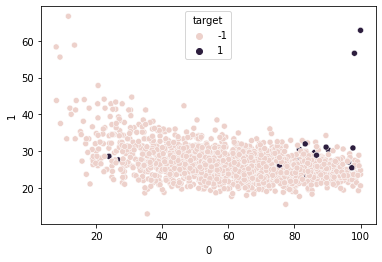

In [9]:
#original ds

sns.scatterplot(data=data.sample(1784, random_state=0),
                x="0",
                y="1",
                hue="target")

<AxesSubplot:xlabel='0', ylabel='1'>

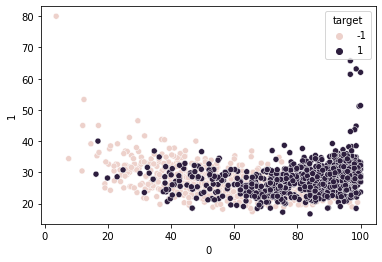

In [10]:
# for undersample ds

col_names = [str(i) for i in range(74)] + ['target']

data_resampled = pd.concat([X_rus, y_rus], axis=1)
data_resampled.columns = col_names

sns.scatterplot(data=data_resampled, x="0", y="1", hue="target")

The distributions are similar to that of the original data. The reason more purple dots are seen, is because now they are not covered by the pink ones.

## 2. Condensed Nearest Neighbours

__Method of data Exclusion__: Samples outside the boundary between the classes <br>
__Final Dataset Size__: Varies <br>
__Fixed vs Cleaning__: Cleaning <br>
__Under-sampling criteria__: Keep boundary observations <br>

#### Resempling

In [ ]:
# this might take a while

cnn = CondensedNearestNeighbour(
    sampling_strategy='auto', 
    random_state=0,
    n_neighbors=1,
    n_jobs=4) 

X_cnn, y_cnn = cnn.fit_resample(X_train, y_train)

In [ ]:
# size of undersampled data

X_cnn.shape, y_cnn.shape

In [ ]:
# number of positive class in original dataset
y_train.value_counts()

#### Plot data

In [ ]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

In [ ]:
# undersampled data

sns.scatterplot(data=X_cnn,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

In [ ]:
# original data

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

In [ ]:
sns.scatterplot(data=X_cnn,
                x="4",
                y="5",
                hue=y_cnn)

plt.title('Undersampled data')

## 3. Tomek Links

__Method of data Exclusion__: removes samples which are Tomek Links <br>
__Final Dataset Size__: Varies <br>
__Fixed vs Cleaning__: Cleaning <br>
__Under-sampling criteria__: Remove noisy observations <br>

#### Resampling

In [11]:
# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_tl, y_tl = tl.fit_resample(X_train, y_train)

In [12]:
# size of undersampled data

X_tl.shape, y_tl.shape

((101938, 74), (101938,))

The under-sampled data set is very similar to the original dataset, only 5 observations were removed. So there is no real point in testing the performance. The difference in performance will most likely be driven by the randomness of Random Forests than by the difference in the datasets.

In [13]:
# number of positive class in original dataset
y_train.value_counts()

-1    101134
 1       891
Name: target, dtype: int64

#### Plot data

Text(0.5, 1.0, 'Original data')

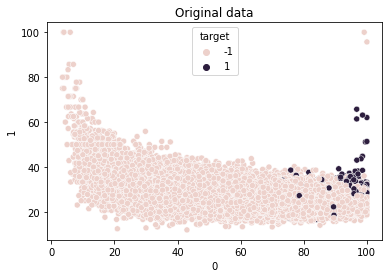

In [14]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

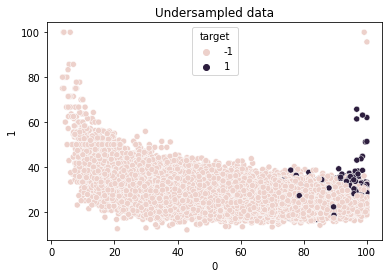

In [15]:
# undersampled data

sns.scatterplot(data=X_tl,
                x="0",
                y="1",
                hue=y_tl)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

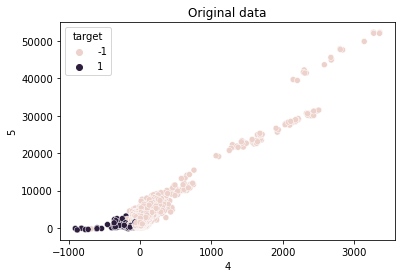

In [16]:
# original data

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

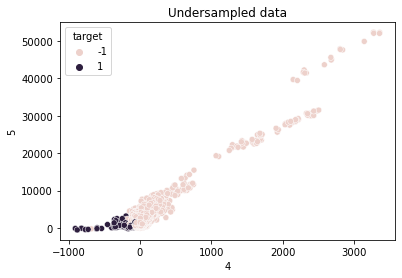

In [17]:
sns.scatterplot(data=X_tl,
                x="4",
                y="5",
                hue=y_tl)

plt.title('Undersampled data')

## 4. One Sided Selection

__Method of data Exclusion__: CNN + Tomek Links <br>
__Final Dataset Size__: Varies <br>
__Fixed vs Cleaning__: Cleaning <br>
__Under-sampling criteria__: Both keep and remove boundary observations <br>

#### Resempling

In [18]:
# this is going to take a while

oss = OneSidedSelection(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,
    n_neighbors=1,
    n_jobs=4) 

X_oss, y_oss = oss.fit_resample(X_train, y_train)

In [19]:
# size of undersampled data
X_oss.shape, y_oss.shape

((101769, 74), (101769,))

In [20]:
# number of positive class in original dataset
y_train.value_counts()

-1    101134
 1       891
Name: target, dtype: int64

#### Plot data

In [ ]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

In [ ]:
# undersampled data

sns.scatterplot(data=X_oss,
                x="0",
                y="1",
                hue=y_oss)

plt.title('Undersampled data')

In [ ]:
# original data

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

In [ ]:
sns.scatterplot(data=X_oss,
                x="4",
                y="5",
                hue=y_oss)

plt.title('Undersampled data')

## 5. Edited Nearest Neighbours

__Method of data Exclusion__: Observation's class is different from that of its nearest neighbours <br>
__Final Dataset Size__: Varies <br>
__Fixed vs Cleaning__: Cleaning <br>
__Under-sampling criteria__: Remove noisy observations <br>

#### Resampling

In [ ]:
# edited nearest neighbours

enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # resamples the majority class
    n_neighbors=3,
    kind_sel='all', 
    n_jobs=4)

X_enn, y_enn = enn.fit_resample(X_train, y_train)

In [ ]:
# compare shapes

X_train.shape, X_enn.shape

#### Plot data

In [ ]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

In [ ]:
# enn undersampled data

sns.scatterplot(data=X_enn,
                x="0",
                y="1",
                hue=y_enn)

plt.title('Edited NN data')

In [ ]:
# original data, other set of variables

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

In [ ]:
# enn undersampled data

sns.scatterplot(data=X_enn,
                x="4",
                y="5",
                hue=y_enn)

plt.title('Edited NN data')

## 6. Repeated Edited Nearest Neighbours

__Method of data Exclusion__: Repeats ENN multiple times <br>
__Final Dataset Size__: Varies <br>
__Fixed vs Cleaning__: Cleaning <br>
__Under-sampling criteria__: Remove noisy observations <br>


#### Resampling

In [ ]:
# repeated NN

renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=4,
    max_iter=100)

X_renn, y_renn = renn.fit_resample(X_train, y_train)

In [ ]:
# compare shapes

X_train.shape, X_renn.shape

#### Plot data


In [ ]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

In [ ]:
# renn undersampled data

sns.scatterplot(data=X_renn,
                x="0",
                y="1",
                hue=y_renn)

plt.title('Repeated Edited NN data')

In [ ]:
# original data, other set of variables

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

In [ ]:
# renn undersampled data

sns.scatterplot(data=X_renn,
                x="4",
                y="5",
                hue=y_renn)

plt.title('Repeated Edited NN data')

## 7. All KNN

__Method of data Exclusion__: Repeats ENN, plus 1 neighbour in each KNN iteration <br>
__Final Dataset Size__: Varies <br>
__Fixed vs Cleaning__: Cleaning <br>
__Under-sampling criteria__: Remove noisy observations <br>

#### Resampling

In [ ]:
# edited nearest neighbours

allknn = AllKNN(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=4,
)  # I hve 4 cores in my laptop

X_allknn, y_allknn = allknn.fit_resample(X_train, y_train)

In [ ]:
# compare shapes

X_train.shape, X_enn.shape, X_renn.shape, X_allknn.shape

## 8. Neighbourhood Cleaning Rule

__Method of data Exclusion__: Combines ENN with a 1 KNN data exclusion criteria <br>
__Final Dataset Size__: Varies <br>
__Fixed vs Cleaning__: Cleaning <br>
__Under-sampling criteria__: Remove noisy observations <br>

#### Resampling

In [ ]:
# set up Neighbourhood cleaning rule

ncr = NeighbourhoodCleaningRule(
    sampling_strategy='auto',# removes only the majority class
    n_neighbors=3, # 3 KNN
    kind_sel='all', # all neighbouring observations should show the same class
    n_jobs=4, # 4 processors in my laptop
    threshold_cleaning=0.5) # threshold no exclude or not observations 

X_ncr, y_ncr = ncr.fit_resample(X_train, y_train)

In [ ]:
# compare shapes

X_train.shape, X_ncr.shape

We see that the rule did not exclude a lot of samples, only 2.

## 9. NearMiss

__Final Dataset Size__: 2 x minority class <br>
__Fixed vs Cleaning__: Fixed <br>
__Under-sampling criteria__: Keep boundary observations <br>

#### Resempling

In [ ]:
# NearMiss version 1

nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_nm1, y_nm1 = nm1.fit_resample(X_train, y_train)

In [ ]:
# NearMiss version 2

nm2 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=2,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_nm2, y_nm2 = nm2.fit_resample(X_train, y_train)

In [ ]:
# NearMiss version 3

nm3 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=3,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_nm3, y_nm3 = nm3.fit_resample(X_train, y_train)

In [ ]:
# compare shapes

X_train.shape, X_nm1.shape, X_nm2.shape, X_nm3.shape

## 10. Instance Hardness Threshold

__Method of data Exclusion__: Probability by a certain classifier
is above a threshold <br>
__Final Dataset Size__: Varies. Minimum 2 x minority class <br>
__Fixed vs Cleaning__: Fixed <br>
__Under-sampling criteria__: Remove noisy observations <br>

#### Reshaping

In [ ]:
# instance hardness threshold using logistic regression

iht_logit = InstanceHardnessThreshold(
    estimator=LogisticRegression(random_state=0),
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,
    n_jobs=4, 
    cv=3)  # not 5 as this is only a demo work

X_logit, y_logit = iht_logit.fit_resample(X_train, y_train)

In [ ]:
# instance hardness threshold using random forests

iht_rf = InstanceHardnessThreshold(
    estimator=RandomForestClassifier(n_estimators=100, random_state=0),
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,
    n_jobs=4, # have 4 processors in my laptop
    cv=3)


X_rf, y_rf = iht_rf.fit_resample(X_train, y_train)

In [ ]:
# compare shapes

X_train.shape, X_logit.shape, X_rf.shape

## Machine learning performance comparison

Here, I will try to compare Random Fores and Logistic Regression algorithms.

In [ ]:
def do_scaling(X_train, X_test=None):
    scaler = StandardScaler()
    scaler.fit_transform(X_train)
    scaler.fit_transform(X_test)

In [ ]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test,
                     X_resampled, y_resampled):
    
    print("RANDOM FOREST", "\n")
    
    # for original sets
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Original Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Original Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print("\n")
    
    # for resampled sets
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_resampled, y_resampled)
    
    print('Resampled Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Resampled Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    print("*"*60)
    print("\n")

In [ ]:
def run_logisticRegression(X_train, X_test, y_train, y_test,
                     X_resampled, y_resampled):
    
    print("LOGISTIC REGRESION", "\n")
    
    # for original dsets
    do_scaling(X_train, X_test)    
    
    logr = LogisticRegression(random_state=0)
    logr.fit(X_train, y_train)

    print('Original Train set')
    pred = logr.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Original Test set')
    pred = logr.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print("\n")
    
    # for resampled dsets
    do_scaling(X_resampled)
    
    logr = LogisticRegression(random_state=0)
    logr.fit(X_resampled, y_resampled)
    
    print('Resampled Train set')
    pred = logr.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Resampled Test set')
    pred = logr.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    print("*"*60)
    print("\n")

In [ ]:
def run_KNN(X_train, X_test, y_train, y_test,
                     X_resampled, y_resampled):
    
    print("KNN", "\n")
    
    # for original dsets
    #do_scaling(X_train, X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    
    print('Original rain set')
    pred = knn.predict_proba(X_train)
    print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Original test set')
    pred = knn.predict_proba(X_test)
    print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print("\n")
    
    # for resampled dsets
    #do_scaling(X_resampled)
    
    knn = KNeighborsClassifier()
    knn.fit(X_resampled, y_resampled)
    
    print('Resampled Train set')
    pred = knn.predict_proba(X_resampled)
    print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Resampled Test set')
    pred = knn.predict_proba(X_test)
    print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    print("*"*60)
    print("\n")

In [ ]:
def run_ML_models(X_train, X_test, y_train, y_test, X_resampled, y_resampled):
    run_randomForests(X_train, X_test, y_train, y_test, X_resampled, y_resampled)
    run_logisticRegression(X_train, X_test, y_train, y_test, X_resampled, y_resampled)
    #run_KNN(X_train, X_test, y_train, y_test, X_resampled, y_resampled)

In [ ]:
run_ML_models(X_train, X_test, y_train, y_test, X_resampled, y_resampled)

In [ ]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

In [ ]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Quite a big jump in model performance.

In [ ]:
def run_logisticRegression(X_train, X_test, y_train, y_test):
    
    rf = LogisticRegression(random_state=0)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))